In [1]:
from IPython.display import display, HTML, Image
display(HTML("<style>.container { width:95% !important; }</style>"))

%load_ext autoreload
%autoreload 2

import os
import numpy as np
import scanpy as sc

from matplotlib import cm
import matplotlib.pyplot as plt

import sys
sys.path.append("../../lib")
from stpalette import palette1
from utils import loadADs, scaleMH, concatADs
from plots import simpleCorrPlot, simpleCorrPlotAll

In [2]:
model = 'WM4237'

In [3]:
preprocessedDataPath = 'c:/Projects/A_ST/from HPCC 11 28 2022/results_NF1-nod-t2t-k35/%s/' % model
dataPath = '../../data/'

ids = sorted(np.loadtxt(dataPath + 'ids_%s_ST.txt' % model, dtype=str))
ids

['WM4237_T0_S1_ST',
 'WM4237_T0_S2_ST',
 'WM4237_T1_S1_ST',
 'WM4237_T1_S2_ST',
 'WM4237_T2_S1_ST',
 'WM4237_T2_S2_ST',
 'WM4237_T3_S1_ST',
 'WM4237_T3_S2_ST',
 'WM4237_T4_S1_ST',
 'WM4237_T4_S2_ST',
 'WM4237_TC_S1_ST',
 'WM4237_TC_S2_ST',
 'WM4237_TE_S1_ST',
 'WM4237_TE_S2_ST',
 'WM4237_TE_S3_ST',
 'WM4237_TE_S4_ST']

In [4]:
palette1.update({id: cm.terrain(0.01 + i/len(ids)) for i, id in enumerate(ids)})

# Load pre-processed samples

In [6]:
ads = loadADs(ids, preprocessedDataPath)

# Scale library sizes

Sample 	 Median (across spots) total mRNA, before scaling, human spots
WM4237_T0_S1_ST 	 20508.0
WM4237_T0_S2_ST 	 23357.0
WM4237_T1_S1_ST 	 12028.0
WM4237_T1_S2_ST 	 5046.0
WM4237_T2_S1_ST 	 7235.0
WM4237_T2_S2_ST 	 7340.0
WM4237_T3_S1_ST 	 9253.0
WM4237_T3_S2_ST 	 14952.0
WM4237_T4_S1_ST 	 14214.0
WM4237_T4_S2_ST 	 11604.0
WM4237_TC_S1_ST 	 12571.0
WM4237_TC_S2_ST 	 19977.0
WM4237_TE_S1_ST 	 27421.0
WM4237_TE_S2_ST 	 32372.0
WM4237_TE_S3_ST 	 30370.0
WM4237_TE_S4_ST 	 39643.0


C:\Users\domans\Anaconda3\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'clusters' as categorical
C:\Users\domans\Anaconda3\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'clusters_consensus' as categorical
C:\Users\domans\Anaconda3\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will

{'WM4237_T0_S1_ST': 22401.00016260147,
 'WM4237_T0_S2_ST': 22024.000160694122,
 'WM4237_T1_S1_ST': 20078.000232696533,
 'WM4237_T1_S2_ST': 22041.000175476074,
 'WM4237_T2_S1_ST': 21242.00034713745,
 'WM4237_T2_S2_ST': 22607.000164031982,
 'WM4237_T3_S1_ST': 22172.00024652481,
 'WM4237_T3_S2_ST': 22229.000226020813,
 'WM4237_T4_S1_ST': 20032.000237464905,
 'WM4237_T4_S2_ST': 20116.000200748444,
 'WM4237_TC_S1_ST': 20343.000413417816,
 'WM4237_TC_S2_ST': 20081.00028038025,
 'WM4237_TE_S1_ST': 20459.00035715103,
 'WM4237_TE_S2_ST': 20043.00030374527,
 'WM4237_TE_S3_ST': 22360.000216960907,
 'WM4237_TE_S4_ST': 22120.000310897827}

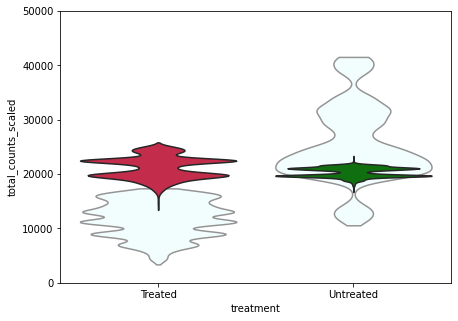

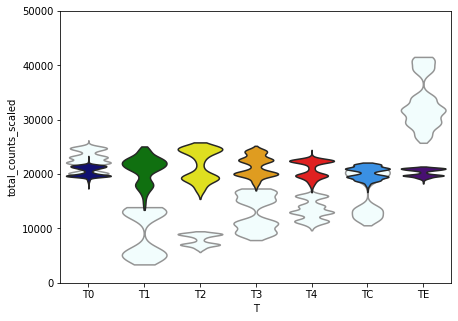

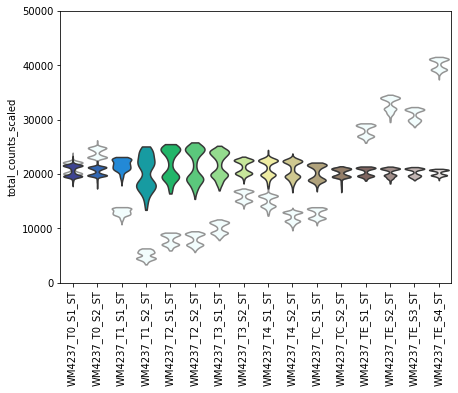

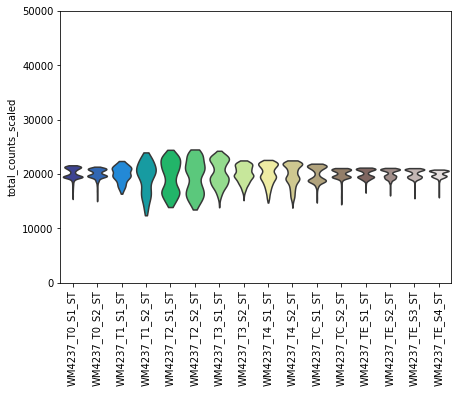

In [7]:
initialLibrarySizes = scaleMH(ads, ids, palette=palette1)
initialLibrarySizes

# Concatenate all RNA data objects

In [8]:
ad_all = concatADs(ads, ids)

(19847, 31825)


# Correlation of counts across samples

### Correlation across technical replicates

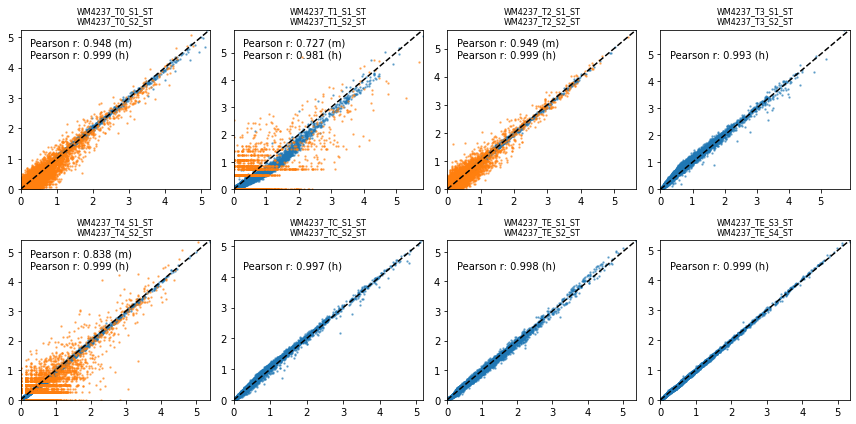

In [10]:
ni, nj = 2, 4
fig, axs = plt.subplots(ni, nj, figsize=(nj*3, ni*3))

simpleCorrPlot(ids[0], ids[1], axs[0, 0], ad_all)
simpleCorrPlot(ids[2], ids[3], axs[0, 1], ad_all)
simpleCorrPlot(ids[4], ids[5], axs[0, 2], ad_all)
simpleCorrPlot(ids[6], ids[7], axs[0, 3], ad_all)

simpleCorrPlot(ids[8], ids[9], axs[1, 0], ad_all)
simpleCorrPlot(ids[10], ids[11], axs[1, 1], ad_all)
simpleCorrPlot(ids[12], ids[13], axs[1, 2], ad_all)
simpleCorrPlot(ids[14], ids[15], axs[1, 3], ad_all)

fig.tight_layout()

### Correlation across biological replicates 

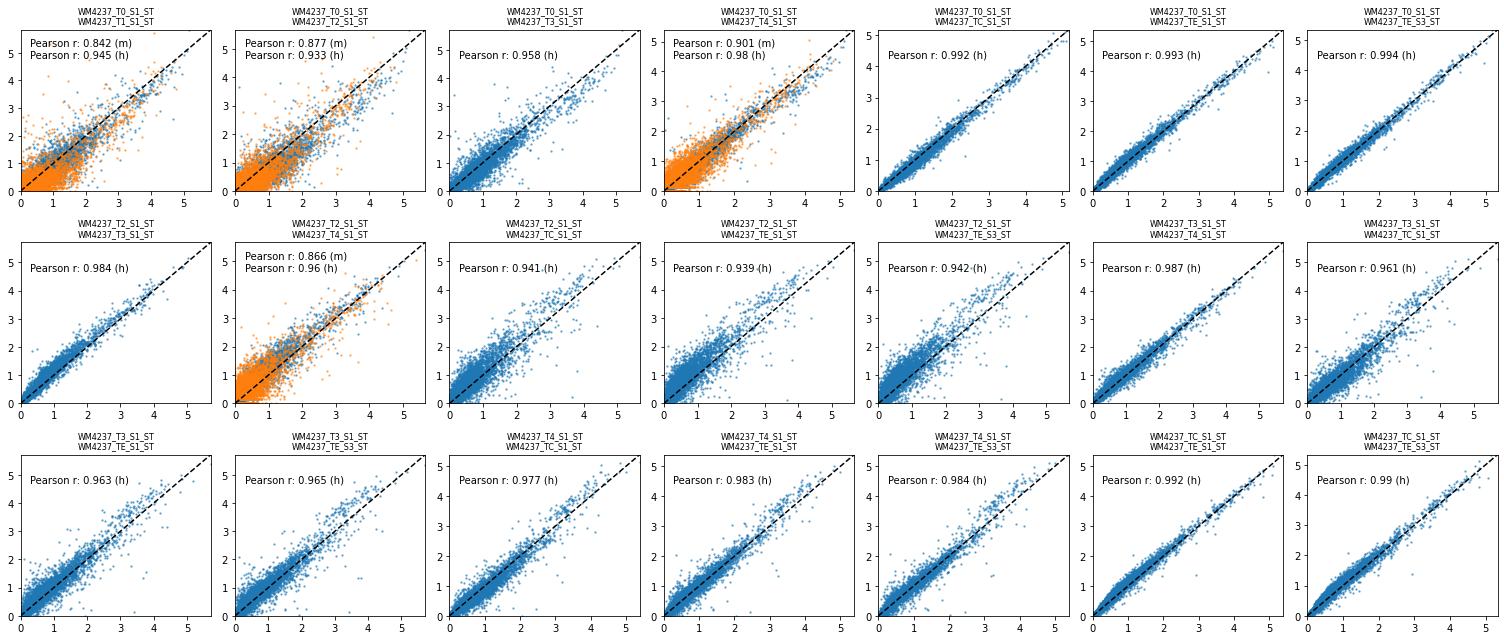

In [11]:
ni, nj = 3, 7
fig, axs = plt.subplots(ni, nj, figsize=(nj*3, ni*3))

simpleCorrPlot(ids[0], ids[2], axs[0, 0], ad_all)
simpleCorrPlot(ids[0], ids[4], axs[0, 1], ad_all)
simpleCorrPlot(ids[0], ids[6], axs[0, 2], ad_all)
simpleCorrPlot(ids[0], ids[8], axs[0, 3], ad_all)
simpleCorrPlot(ids[0], ids[10],axs[0, 4], ad_all)
simpleCorrPlot(ids[0], ids[12],axs[0, 5], ad_all)
simpleCorrPlot(ids[0], ids[14],axs[0, 6], ad_all)

simpleCorrPlot(ids[4], ids[6], axs[1, 0], ad_all)
simpleCorrPlot(ids[4], ids[8], axs[1, 1], ad_all)
simpleCorrPlot(ids[4], ids[10],axs[1, 2], ad_all)
simpleCorrPlot(ids[4], ids[12],axs[1, 3], ad_all)
simpleCorrPlot(ids[4], ids[14],axs[1, 4], ad_all)
simpleCorrPlot(ids[6], ids[8], axs[1, 5], ad_all)
simpleCorrPlot(ids[6], ids[10],axs[1, 6], ad_all)

simpleCorrPlot(ids[6], ids[12],axs[2, 0], ad_all)
simpleCorrPlot(ids[6], ids[14],axs[2, 1], ad_all)
simpleCorrPlot(ids[8], ids[10],axs[2, 2], ad_all)
simpleCorrPlot(ids[8], ids[12],axs[2, 3], ad_all)
simpleCorrPlot(ids[8], ids[14],axs[2, 4], ad_all)
simpleCorrPlot(ids[10],ids[12],axs[2, 5], ad_all)
simpleCorrPlot(ids[10],ids[14],axs[2, 6], ad_all)

fig.tight_layout()

# Save data object

In [12]:
ad_all.write(dataPath + 'ad_all_scaled_unfiltered_st_%s.h5ad' % model)

C:\Users\domans\Anaconda3\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'clusters' as categorical
C:\Users\domans\Anaconda3\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'clusters_consensus' as categorical
C:\Users\domans\Anaconda3\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will